# SVM Initial Classifier

This shows a similar output as 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from functools import partial

In [2]:
x_row = np.load('../data/random_complete.npy')
x_random = np.load('../data/row_complete.npy')

x = np.append(x_row, x_random, axis=0).reshape(900, 49)
y = np.append(np.ones(450) * -1, np.ones(450))

print(x.shape, y.shape)

(900, 49) (900,)


In [7]:
# hanna's kernel function:  φ(x,μ)=exp[ –||x–μ||^2 /σ^2 ]

def hanna_gaussian_kernel(x, mu, sigma):
    return np.exp(-np.sum((x - mu) ** 2) / sigma ** 2)

    
def proxy_kernel(X1, X2, K, sigma=5):
    """(Pre)calculates Gram Matrix K"""
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))

    for i, x1 in enumerate(X1):
        x1 = x1.flatten()
        for j, x2 in enumerate(X2):
            x2 = x2.flatten()
            gram_matrix[i, j] = K(x1, x2, sigma)

    return gram_matrix

SVM uses functools.partial(<function proxy_kernel at 0x11ebcd7a0>, K=<function hanna_gaussian_kernel at 0x11ebcd5f0>, sigma=25) kernel.


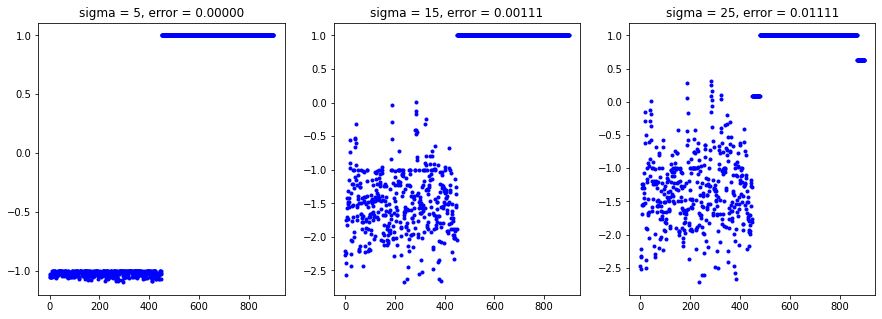

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, sigma in enumerate([5, 15, 25]):
    model = svm.SVC(kernel=partial(proxy_kernel, K=hanna_gaussian_kernel, sigma=sigma))
    model.fit(x, y)

    errors = [1 if pred != y[i] else 0 for i, pred in enumerate(model.predict(x))]
    y_decision = model.decision_function(x)
    
    axs[i].scatter(np.arange(0, len(y)), y_decision, marker='.', c="b")
    axs[i].set_title(f"sigma = {sigma}, error = {sum(errors) / len(errors):0.05f}")

plt.show()